In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import (
    RocCurveDisplay,
    PrecisionRecallDisplay,
    roc_auc_score,
    average_precision_score,
    precision_recall_curve
)


In [2]:
# carregar y_test
y_test = pd.read_csv("y_test.csv").squeeze()

# carregar probabilidades
y_prob_logit = np.load("y_prob_logit.npy")
y_prob_rf = np.load("y_prob_rf.npy")
y_prob_cat = np.load("y_prob_cat.npy")


In [3]:
print(len(y_test), len(y_prob_logit), len(y_prob_rf), len(y_prob_cat))


43482 43482 43482 43482


<Figure size 700x500 with 0 Axes>

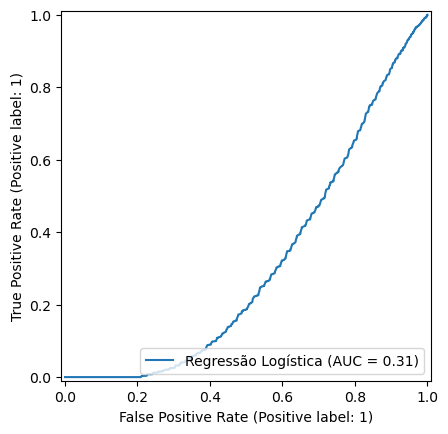

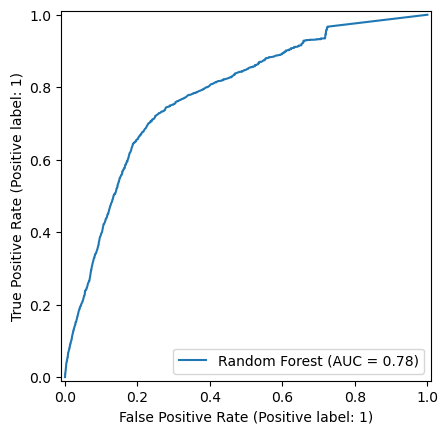

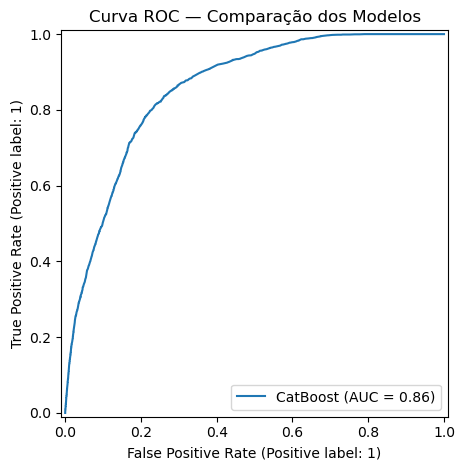

In [4]:
plt.figure(figsize=(7, 5))

RocCurveDisplay.from_predictions(
    y_test, y_prob_logit, name="Regressão Logística"
)
RocCurveDisplay.from_predictions(
    y_test, y_prob_rf, name="Random Forest"
)
RocCurveDisplay.from_predictions(
    y_test, y_prob_cat, name="CatBoost"
)

plt.title("Curva ROC — Comparação dos Modelos")
plt.tight_layout()
plt.show()


<Figure size 700x500 with 0 Axes>

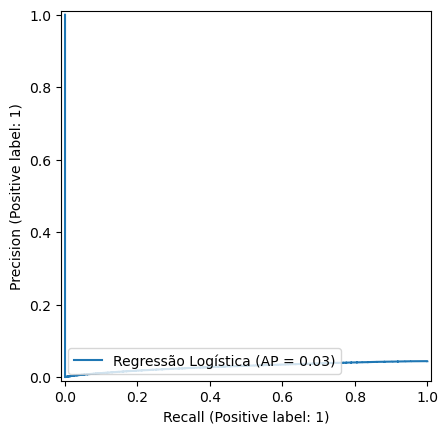

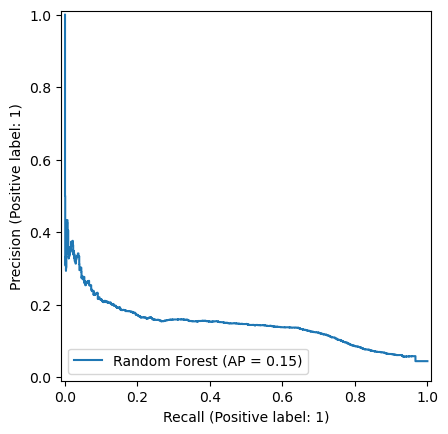

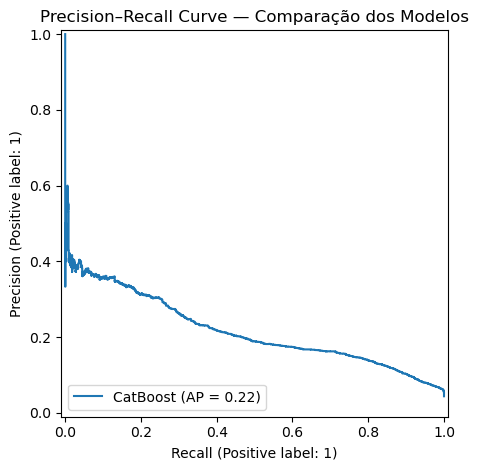

In [5]:
plt.figure(figsize=(7, 5))

PrecisionRecallDisplay.from_predictions(
    y_test, y_prob_logit, name="Regressão Logística"
)
PrecisionRecallDisplay.from_predictions(
    y_test, y_prob_rf, name="Random Forest"
)
PrecisionRecallDisplay.from_predictions(
    y_test, y_prob_cat, name="CatBoost"
)

plt.title("Precision–Recall Curve — Comparação dos Modelos")
plt.tight_layout()
plt.show()


In [6]:
df_metricas = pd.DataFrame({
    "Modelo": ["Logit", "Random Forest", "CatBoost"],
    "ROC_AUC": [
        roc_auc_score(y_test, y_prob_logit),
        roc_auc_score(y_test, y_prob_rf),
        roc_auc_score(y_test, y_prob_cat)
    ],
    "PR_AUC": [
        average_precision_score(y_test, y_prob_logit),
        average_precision_score(y_test, y_prob_rf),
        average_precision_score(y_test, y_prob_cat)
    ]
})

df_metricas


,Modelo,ROC_AUC,PR_AUC
0,Logit,0.311021,0.029007
1,Random Forest,0.780655,0.145468
2,CatBoost,0.856950,0.217154


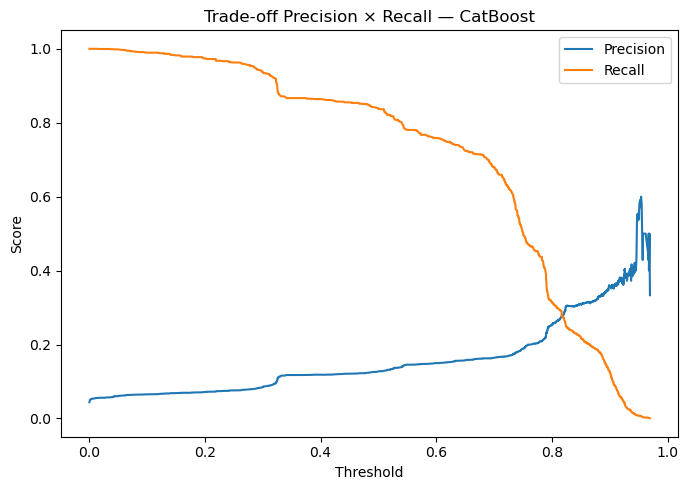

In [7]:
precision, recall, thresholds = precision_recall_curve(
    y_test, y_prob_cat
)

plt.figure(figsize=(7, 5))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Trade-off Precision × Recall — CatBoost")
plt.tight_layout()
plt.show()


In [8]:
import numpy as np

idx = np.where(recall[:-1] >= 0.80)[0][0]
best_threshold = thresholds[idx]
best_threshold


np.float64(0.00016524727323264407)

In [9]:
y_pred_adj = (y_prob_cat >= best_threshold).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_adj))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     41569
           1       0.04      1.00      0.08      1913

    accuracy                           0.04     43482
   macro avg       0.02      0.50      0.04     43482
weighted avg       0.00      0.04      0.00     43482



/home/raiche/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raiche/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/raiche/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
